# Compare different projections

In [1]:
import xarray as xr
import pandas as pd
import matplotlib.pyplot as plt

In [21]:
data_dir = '../outputs/ref_proj/'
#namelists = ['loc', 'loc_TempAll', 'loc_TempAll_odyn_CMIP5']
namelists = ['CMIP5_glo', 'AR5_glo'] #, 'loc_TempAll_odyn_CMIP5', 'KNMI14']
sce ='rcp85'

proj_ds_list = []
for proj in namelists:
    proj_ds_list.append(xr.open_dataset(f'{data_dir}SeaLevelPerc_{proj}_{sce}.nc'))


### Compare the percentiles in 2100

In [22]:
proj_ds_list[0].perc_ts.sel(time=2100, proc='Total')

<xarray.DataArray 'perc_ts' (percentiles: 11)>
array([ 46.805921,  53.725971,  57.672488,  61.38401 ,  62.671888,  72.880534,
        83.814127,  85.314591,  89.893195,  95.23292 , 106.263643])
Coordinates:
    proc         <U5 'Total'
  * percentiles  (percentiles) int64 1 5 10 17 20 50 80 83 90 95 99
    time         int64 2100
Attributes:
    units:      cm
    long_name:  Time series of percentiles.

In [23]:
for idx, proj in enumerate(namelists):
    df = proj_ds_list[idx].perc_ts.sel(time=2100, proc='Total').to_dataframe()
    if idx == 0:
        tot_df = pd.DataFrame(df['perc_ts'])
        tot_df = tot_df.rename(columns={'perc_ts': proj})
    else:
        tot_df[proj] = df['perc_ts']
tot_df

,CMIP5_glo,AR5_glo
percentiles,,
1,46.805921,46.394023
5,53.725971,53.753272
10,57.672488,57.957038
17,61.384010,61.889850
20,62.671888,63.302057
50,72.880534,74.129131
80,83.814127,85.774071
83,85.314591,87.419665
90,89.893195,92.336044


### Compare the time series of individual contributors

In [24]:
nb_proc = len(proj_ds_list[0].proc)
perc = 50

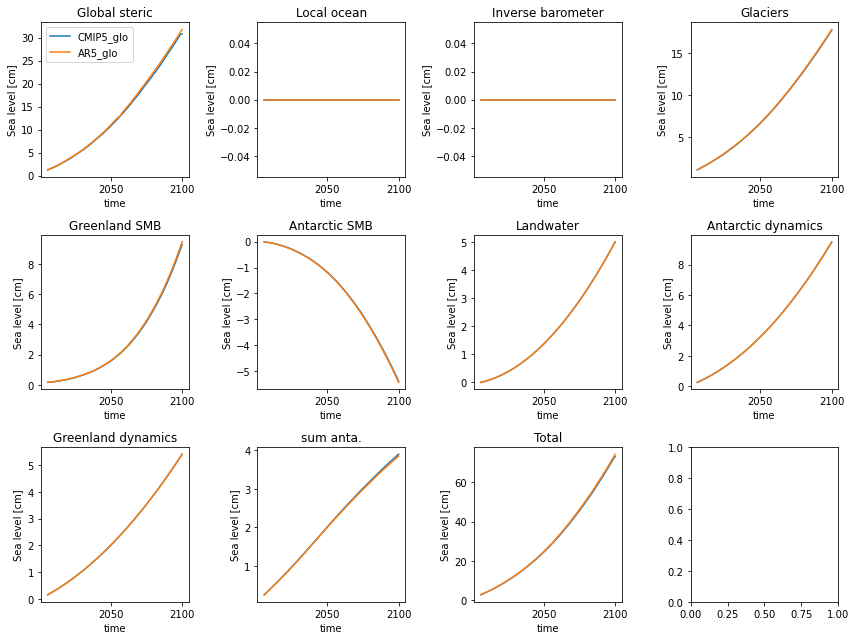

In [25]:
fig, axes = plt.subplots(nrows=3, ncols=4, figsize=(12,9))
for m in range(nb_proc):
    lin=int(m/4)
    col=m%4
    for i in range(len(proj_ds_list)):
        proj_ds_list[i]['perc_ts'].attrs['long_name'] = 'Sea level'
        proj_ds_list[i].perc_ts.sel(percentiles=perc).isel(proc=m).plot(ax=axes[lin,col])
    axes[lin,col].set_title(proj_ds_list[0].proc[m].values)
axes[0,0].legend(namelists)
plt.tight_layout()